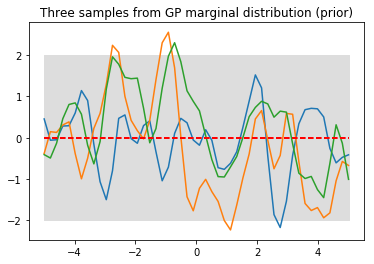

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate n (one dimensional) data points in range [-5, 5]
n = 50
X_test = np.linspace(-5, 5, n)

# Define the kernel function between two data points (vectors)
def kernel(x1, x2, sqsigma=0.1):
    sqdist = np.sum(x1 - x2) ** 2
    return np.exp(-sqdist / (2 * sqsigma))

# Define the kernel function between two matrices of data points
def matrix_kernel(X1, X2):
    n1, n2 = X1.shape[0], X2.shape[0]
    K = np.zeros((n1, n2))
    for i in xrange(n1):
        for j in xrange(n2):
            K[i, j] = kernel(X1[i], X2[j])
    return K
    
# Fill in the kernel matrix
K_ss = matrix_kernel(X_test, X_test)

# Get Cholesky decomposition (square root) of K
# Add small positive diagonal to ensure positive definiteness
L = np.linalg.cholesky(K_ss + 1e-15 * np.eye(n))

# Sample three 50 dimensional N(0, I)
# Multiply by L (square root of K) to get three 50 dimensional N(0, K)
f_prior = np.dot(L, np.random.normal(size=(n, 3)))

plt.title("Three samples from GP marginal distribution (prior)")
plt.plot(X_test, f_prior)
plt.gca().fill_between(X_test, -2*np.diag(K_ss), 
                       2*np.diag(K_ss), color="#dddddd")
plt.plot(X_test, np.zeros(n), "r--", lw=2)
plt.show()

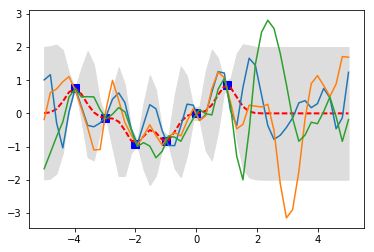

In [2]:
# Noiseless training data
X_train = np.array(xrange(-4, 2))
y_train = np.sin(X_train)

# Construct kernel matrix for training data
K = matrix_kernel(X_train, X_train)
L = np.linalg.cholesky(K + 1e-15 * np.eye(K.shape[0]))

# Compute conditional mean for test data
K_s = matrix_kernel(X_train, X_test)
alpha = np.linalg.solve(L.T, np.linalg.solve(L, y_train))
mu = np.dot(K_s.T, alpha)

# Compute contional covariance matrix for test data
v = np.linalg.solve(L, K_s)
sigma = K_ss - v.T.dot(v)

# Sample from posterior
L = np.linalg.cholesky(sigma + 1e-15 * np.eye(sigma.shape[0]))
f_post = mu.reshape(-1, 1) + np.dot(L, np.random.normal(size=(n, 3)))

#plt.plot(X_test, np.sin(X_test))
plt.plot(X_train, y_train, "bs", ms=8)
plt.gca().fill_between(X_test, mu - 2*np.diag(sigma), 
                       mu + 2*np.diag(sigma), color="#dddddd")
plt.plot(X_test, mu, "r--", lw=2)
plt.plot(X_test, f_post)
plt.show()

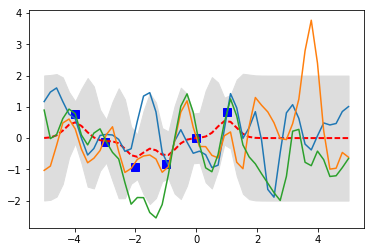

In [3]:
# Noisy training data
X_train = np.array(xrange(-4, 2))
y_train = np.sin(X_train)
noise = 0.5 # sigma_y in most presentations

# Note the diagonal term in K which helps with numerical stability
# Ensures K is positive definite for the Cholesky decomposition
K = matrix_kernel(X_train, X_train) + noise * np.eye(X_train.shape[0])
L = np.linalg.cholesky(K)

# The rest stays exactly the same as before
K_s = matrix_kernel(X_train, X_test)
alpha = np.linalg.solve(L.T, np.linalg.solve(L, y_train))
mu = np.dot(K_s.T, alpha)

v = np.linalg.solve(L, K_s)
sigma = K_ss - v.T.dot(v)

L = np.linalg.cholesky(sigma + 1e-15 * np.eye(sigma.shape[0]))
f_post = mu.reshape(-1, 1) + np.dot(L, np.random.normal(size=(n, 3)))

plt.plot(X_train, y_train, "bs", ms=8)
plt.gca().fill_between(X_test, mu - 2*np.diag(sigma), 
                       mu + 2*np.diag(sigma), color="#dddddd")
plt.plot(X_test, mu, "r--", lw=2)
plt.plot(X_test, f_post)
plt.show()